In [34]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, ndcg_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных

In [13]:
df = pd.read_csv('intern_task.csv')

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,2,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001350,0.000002,3.0,1.500000
235254,2,29995,1.0,0.0,1.0,0.0,1.0,0.500000,0.0,0.500000,...,0.0,0.000000,0.000000,0.471409,39.908056,0.000000,0.004850,0.000014,9.0,4.500000
235255,1,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001064,0.000001,1.0,0.500000
235256,2,29995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Посмотрим на уникальные значения rank

In [14]:
df['rank'].unique()

array([0, 1, 2, 4, 3])

Есть ли в данных пропуски?
Видим, что пропусков нет

In [15]:
#Есть ли в данных пропуски?
df.isnull().any().any()
#видим, что пропусков нет

False

Ещё раз убеждаемся, что данные не имеют NaN, так как dtypes: float64(140), int64(6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 146 entries, rank to feature_143
dtypes: float64(140), int64(6)
memory usage: 262.1 MB


Посмотрим на распределение оценок релевантности

<Axes: >

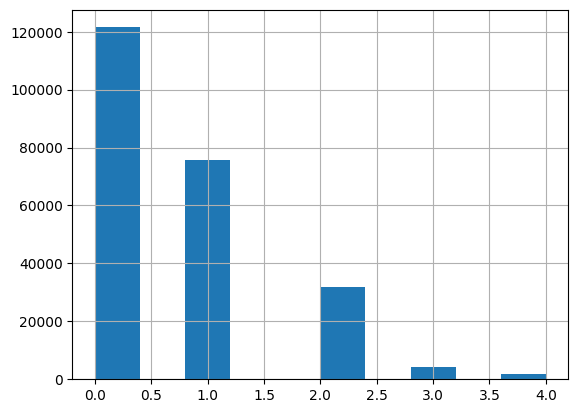

In [21]:
df['rank'].hist()

In [22]:
#Разделим данные на признаки и целевую переменную
y = df['rank']
X = df.drop('rank', axis = 1)

In [24]:
#Разобьем датасет на тренировочную и тестовую части в отношении 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [31]:
bagging_clf = BaggingClassifier(n_estimators = 50)

bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)


Посмотрим на результат ранжирования с помощью BaggingClassifier
Видно, что nDCG score довольно близко к 1, а значит задача решена корректно

In [53]:
print(f'nDCG score = {ndcg_score([y_pred_bagging], [y_test])}')

nDCG score = 0.9101477265074371
